Keras, Tensorflow ---> AI and NN programming

Numpy ---> Working with arrays

cv2, matplotlib ---> Working with images

itertools ---> Easier iterations

In [38]:
import keras as ks
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from itertools import product as prod, chain
from keras import Sequential, layers
from random import randrange as rr

GLOBAL VARIABLES

In [39]:
RESOLUTION = 128
SAMPLES = 5000
VAL_SPLIT = 0.2
EPOCHS = 10

GENERATING SAMPLES

In [40]:
def gen_samples(amount):
    for i in range(amount):
        rand = [rr(256), rr(256), rr(256)]
        rev_rand = [256 - i for i in rand]
        img = np.full((RESOLUTION, RESOLUTION, 3), rand, dtype=np.int32)
        rand_rad = rr(RESOLUTION//2)
        rand_pos = [rr(RESOLUTION//2-(RESOLUTION-rand_rad*2)//2, RESOLUTION//2+(RESOLUTION-rand_rad*2)//2),
                    rr(RESOLUTION//2-(RESOLUTION-rand_rad*2)//2, RESOLUTION//2+(RESOLUTION-rand_rad*2)//2)]
        cv2.circle(img, rand_pos, rand_rad, rev_rand, -1)
        stat = list(chain(*[rand_pos, [rand_rad], rev_rand]))
        yield img, stat

In [41]:
imgs, stats = [], []
for img, stat in gen_samples(SAMPLES):
    imgs.append(img), stats.append(stat)

PLOT SOME SAMPLES

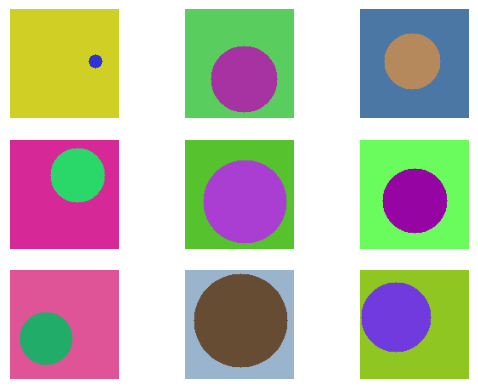

In [42]:
fig, axs = plt.subplots(3, 3)
for x, y in prod(range(3), repeat=2):
    axs[x, y].axis("off")
    axs[x, y].imshow(imgs[rr(SAMPLES)])
plt.show()

CONSTRUCTING MODEL

In [ ]:
mdl = Sequential([
    layers.Rescaling(1./255, input_shape=(RESOLUTION, RESOLUTION, 3,)),
    layers.Conv2D(16, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="leaky_relu"),
    layers.Dense(6)
])

mdl.compile(
    optimizer=ks.optimizers.Adam(),
    loss=ks.losses.MeanSquaredError(),
    metrics=["accuracy"]
)

SPLITING SAMPLES

In [ ]:
x_samples = np.array(imgs).astype("float32").reshape(SAMPLES, RESOLUTION, RESOLUTION, 3)
y_samples = np.array(stats).astype("float32").reshape(SAMPLES, 6)
x_train, y_train = x_samples[int(SAMPLES*(1-VAL_SPLIT)):], y_samples[int(SAMPLES*(1-VAL_SPLIT)):]
x_valid, y_valid = x_samples[:int(SAMPLES*VAL_SPLIT)], y_samples[:int(SAMPLES*VAL_SPLIT)]

TRAINING

In [ ]:
history = mdl.fit(x_samples, y_samples, epochs=EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/10
157/157 [==============================] - 92s 574ms/step - loss: 3284.7405 - accuracy: 0.5562 - val_loss: 1191.7030 - val_accuracy: 0.8820
Epoch 2/10
157/157 [==============================] - 87s 558ms/step - loss: 541.4103 - accuracy: 0.9268 - val_loss: 256.4944 - val_accuracy: 0.9490
Epoch 3/10
157/157 [==============================] - 90s 575ms/step - loss: 186.0843 - accuracy: 0.9526 - val_loss: 145.8270 - val_accuracy: 0.9300
Epoch 4/10
157/157 [==============================] - 84s 535ms/step - loss: 120.5878 - accuracy: 0.9652 - val_loss: 93.1279 - val_accuracy: 0.9740
Epoch 5/10
157/157 [==============================] - 91s 584ms/step - loss: 99.6706 - accuracy: 0.9648 - val_loss: 100.4679 - val_accuracy: 0.9660
Epoch 6/10
157/157 [==============================] - 87s 557ms/step - loss: 87.8785 - accuracy: 0.9666 - val_loss: 107.6879 - val_accuracy: 0.9470
Epoch 7/10
157/157 [==============================] - 88s 558ms/step - loss: 85.8916 - accuracy: 0.9696 - v

PLOTTING ACCURACY OF NEURAL NET

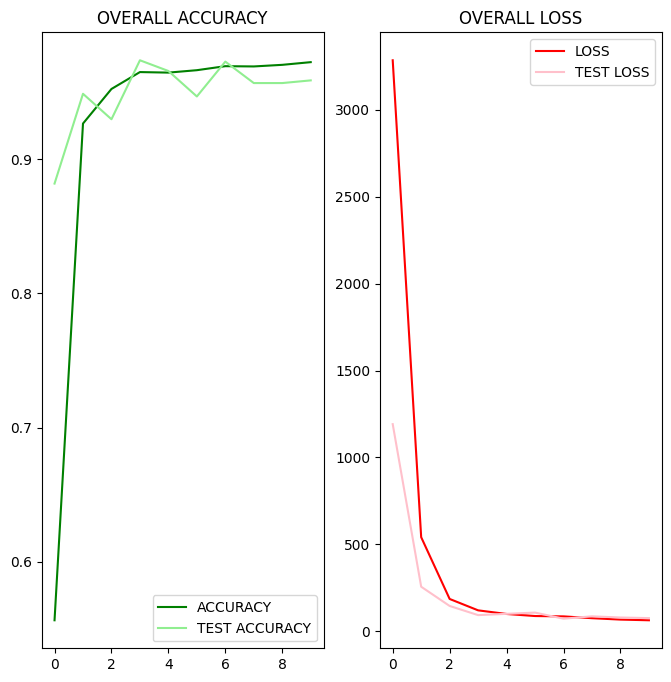

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='ACCURACY', color="green")
plt.plot(epochs, val_acc, label='TEST ACCURACY', color="lightgreen")
plt.legend(loc='lower right')
plt.title('OVERALL ACCURACY')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='LOSS', color="red")
plt.plot(epochs, val_loss, label='TEST LOSS', color="pink")
plt.legend(loc='upper right')
plt.title('OVERALL LOSS')
plt.show()

GENERATING TEST SAMPLES

In [ ]:
imgs, stats = [], []
for img, stat in gen_samples(100):
    imgs.append(img), stats.append(stat)

In [ ]:
x_test = np.array(imgs).astype("int").reshape(100, RESOLUTION, RESOLUTION, 3)
y_test = np.array(stats).astype("int").reshape(100, 6)

In [ ]:
predicted_image = mdl.predict(x_test)

4/4 [==============================] - 2s 181ms/step


TESTING MODEL

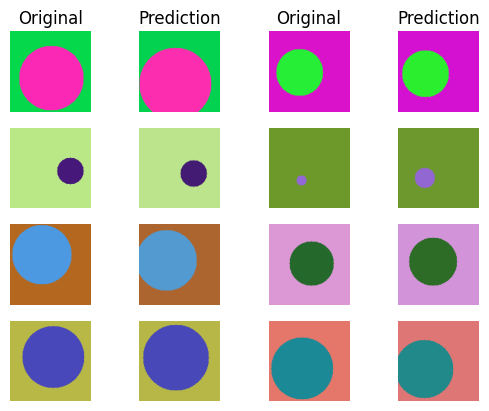

In [34]:
imgs_test = []
add_value = rr(92)
for i in range(8):
    i += add_value
    color = predicted_image[i][3:]
    color = [int(i) for i in color]
    pos = predicted_image[i][:2]
    pos = [int(i) for i in pos]
    rad = int(predicted_image[i][2])
    img_color = [255 - i for i in color]
    img_test = np.full((128, 128, 3), img_color, dtype=np.int32)
    cv2.circle(img_test, pos, rad, color, -1)
    imgs_test.append(img_test)
fig, axs = plt.subplots(4, 4)
axs[0, 0].set_title("Original")
axs[0, 1].set_title("Prediction")
axs[0, 2].set_title("Original")
axs[0, 3].set_title("Prediction")
for j in range(4):
    axs[j, 0].axis("off")
    axs[j, 0].imshow(x_test[j+add_value])
    axs[j, 1].axis("off")
    axs[j, 1].imshow(imgs_test[j])
for j in range(4, 8):
    axs[j-4, 2].axis("off")
    axs[j-4, 2].imshow(x_test[j+add_value])
    axs[j-4, 3].axis("off")
    axs[j-4, 3].imshow(imgs_test[j])